In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
#root_path = '/projekt1/radar/webtool/'
root_path = '/project/MA_vis/MA_visualization/data/'

In [3]:
ds_info = xr.open_dataset(f'{root_path}MR_wind_2021_01_07.h5', group = 'info')
#ds_info

## Getting Metadata

In [4]:
year = int(ds_info['date'].values[0,0])
month =int(ds_info['date'].values[1,0])
day =int(ds_info['date'].values[2,0])
date = str(day)+"."+str(month)+"."+str(year)
date

'7.1.2021'

In [5]:
ds_wind = xr.open_dataset(f'{root_path}MR_wind_2021_01_07.h5', group = 'wind')
ds_wind

<xarray.Dataset>
Dimensions:  (phony_dim_6: 24, phony_dim_7: 23, phony_dim_8: 1)
Dimensions without coordinates: phony_dim_6, phony_dim_7, phony_dim_8
Data variables:
    u        (phony_dim_6, phony_dim_7) float64 ...
    u0       (phony_dim_7, phony_dim_8) float64 ...
    u_err    (phony_dim_6, phony_dim_7) float64 ...
    u_fil    (phony_dim_6, phony_dim_7) float64 ...
    v        (phony_dim_6, phony_dim_7) float64 ...
    v0       (phony_dim_7, phony_dim_8) float64 ...
    v_err    (phony_dim_6, phony_dim_7) float64 ...
    v_fil    (phony_dim_6, phony_dim_7) float64 ...
    w        (phony_dim_6, phony_dim_7) float64 ...
    w0       (phony_dim_7, phony_dim_8) float64 ...
    w_err    (phony_dim_6, phony_dim_7) float64 ...
    w_fil    (phony_dim_6, phony_dim_7) float64 ...

In [6]:
ds_wind['u']
ds_wind.rename({'phony_dim_6': 'alt', 'phony_dim_7': 'time'})
ds_wind['alt'] = ds_info['alt'].squeeze().values
ds_wind['alt'].attrs['long_name'] = 'altitude'
ds_wind['alt'].attrs['units'] = 'km'

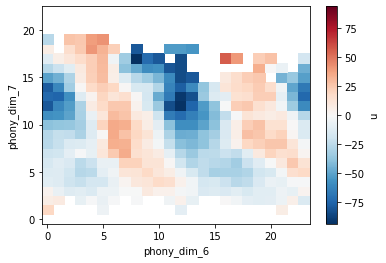

In [7]:
ds_wind['u'].plot(x= 'phony_dim_6', y = 'phony_dim_7')

## 2d plot

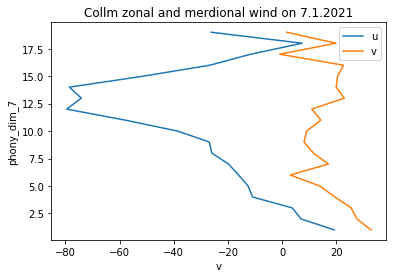

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ds_wind_sel = ds_wind.isel(phony_dim_6=0)
ds_wind_sel['u'].plot(y = 'phony_dim_7', label='u')
ds_wind_sel['v'].plot(y = 'phony_dim_7', label='v')
#ds_wind_sel['w'].plot(y = 'phony_dim_7')
ax.set_title('Collm zonal and merdional wind on '+ date)
plt.legend()
plt.show()